Import libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image, ImageFont, ImageDraw
from IPython.display import display
import pandas as pd 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import svm
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


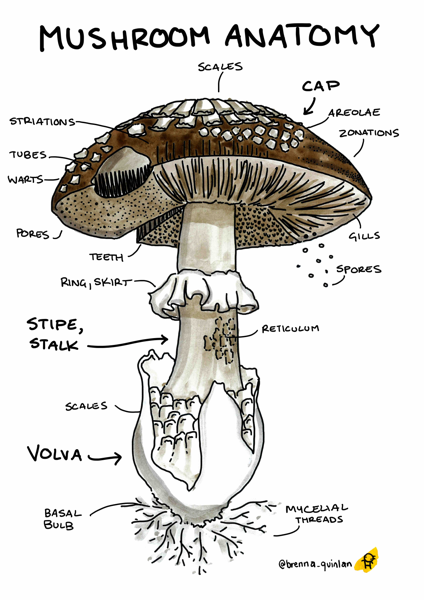

In [3]:
mushroom_anatomy_img = Image.open('Mushroom-Anatomy.jpg')
mushroom_anatomy_img.thumbnail((600,600))
display(mushroom_anatomy_img)

Attribute Information: (classes: edible=e, poisonous=p)

CAP
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

Bruises: bruises=t,no=f

Odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

GILLS
- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

STALK
- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

VEIL
- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

RING
- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

Spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

Population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

Habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Function to display image

In [4]:
def display_image(file_path):
    img = Image.open(file_path)
    display(img)

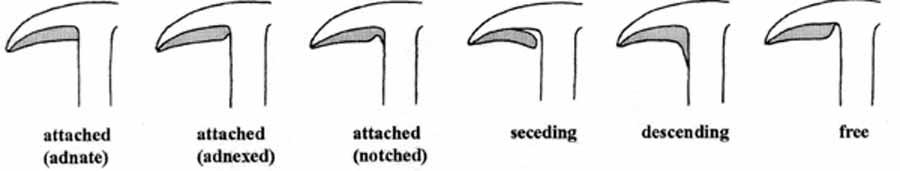

In [5]:
display_image('gill_attachment.jpeg')

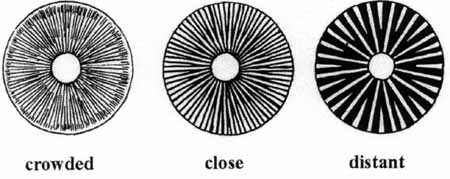

In [6]:
display_image('gill_spacing.jpeg')

In [7]:
data = pd.read_csv('mushrooms.csv')

pd.set_option('display.max_columns', None)
data

## 23 features, 8124 rows

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
0               c         n          k           e          e   
1               c         b          k           e          c   
2               c         b          n           e          c   
3               c         n          n           e          e   
4               w         b          k           t          e   
...           ...       ...        ...         ...        ...   
8119            c         b          y           e          ?   
8120            c         b          y           e          ?   
8121            c         b          n           e          ?   
8122            c         n          b           t          ?   
8123            c         b          y           e          ?   

     stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                           s                        s                      w   
1                           s                        s                      w   
2                           s                        s                      w   
3                           s                        s                      w   
4                           s                        s                      w   
...                       ...                      ...                    ...   
8119                        s                        s                      o   
8120                        s                        s                      o   
8121                        s                        s                      o   
8122                        s                        k                      w   
8123                        s                        s                      o   

     stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                         w         p          w           o         p   
1                         w         p          w           o         p   
2                         w         p          w           o         p   
3                         w         p          w           o         p   
4                         w         p          w           o         e   
...                     ...       ...        ...         ...       ...   
8119                      o         p          o           o         p   
8120                      o         p          n           o         p   
8121                      o         p          o           o         p   
8122                      w         p          w           o         e   
8123                      o         p          o           o         p   

     spore-print-color population habitat  
0                    k          s       u  
1                    n          n       g  
2                    n          n       m  
3                    k          s       u  
4                    n          a       g  
...                ...        ...     ...  
8119                 b          c       l  
8120                 b          v       l  
8121                 b          c       l  
8122                 

In [8]:
data.rename(columns= {"class" : "edible"}, inplace=True)
data

edible cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   
...     ...       ...         ...       ...     ...  ...             ...   
8119      e         k           s         n       f    n               a   
8120      e         x           s         n       f    n               a   
8121      e         f           s         n       f    n               a   
8122      p         k           y         n       f    y               f   
8123      e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
0               c         n          k           e          e   
1               c         b          k           e          c   
2               c         b          n           e          c   
3               c         n          n           e          e   
4               w         b          k           t          e   
...           ...       ...        ...         ...        ...   
8119            c         b          y           e          ?   
8120            c         b          y           e          ?   
8121            c         b          n           e          ?   
8122            c         n          b           t          ?   
8123            c         b          y           e          ?   

     stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                           s                        s                      w   
1                           s                        s                      w   
2                           s                        s                      w   
3                           s                        s                      w   
4                           s                        s                      w   
...                       ...                      ...                    ...   
8119                        s                        s                      o   
8120                        s                        s                      o   
8121                        s                        s                      o   
8122                        s                        k                      w   
8123                        s                        s                      o   

     stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                         w         p          w           o         p   
1                         w         p          w           o         p   
2                         w         p          w           o         p   
3                         w         p          w           o         p   
4                         w         p          w           o         e   
...                     ...       ...        ...         ...       ...   
8119                      o         p          o           o         p   
8120                      o         p          n           o         p   
8121                      o         p          o           o         p   
8122                      w         p          w           o         e   
8123                      o         p          o           o         p   

     spore-print-color population habitat  
0                    k          s       u  
1                    n          n       g  
2                    n          n       m  
3                    k          s       u  
4                    n          a       g  
...                ...        ...     ...  
8119                 b          c       l  
8120                 b          v       l  
8121                 b          c       l  
8122     

In [9]:
data['edible'] = data['edible'].map({'p': False, 'e': True})

## 0 means NOT edible (poisonous), 1 is edible
data

edible cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      False         x           s         n       t    p               f   
1       True         x           s         y       t    a               f   
2       True         b           s         w       t    l               f   
3      False         x           y         w       t    p               f   
4       True         x           s         g       f    n               f   
...      ...       ...         ...       ...     ...  ...             ...   
8119    True         k           s         n       f    n               a   
8120    True         x           s         n       f    n               a   
8121    True         f           s         n       f    n               a   
8122   False         k           y         n       f    y               f   
8123    True         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
0               c         n          k           e          e   
1               c         b          k           e          c   
2               c         b          n           e          c   
3               c         n          n           e          e   
4               w         b          k           t          e   
...           ...       ...        ...         ...        ...   
8119            c         b          y           e          ?   
8120            c         b          y           e          ?   
8121            c         b          n           e          ?   
8122            c         n          b           t          ?   
8123            c         b          y           e          ?   

     stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                           s                        s                      w   
1                           s                        s                      w   
2                           s                        s                      w   
3                           s                        s                      w   
4                           s                        s                      w   
...                       ...                      ...                    ...   
8119                        s                        s                      o   
8120                        s                        s                      o   
8121                        s                        s                      o   
8122                        s                        k                      w   
8123                        s                        s                      o   

     stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                         w         p          w           o         p   
1                         w         p          w           o         p   
2                         w         p          w           o         p   
3                         w         p          w           o         p   
4                         w         p          w           o         e   
...                     ...       ...        ...         ...       ...   
8119                      o         p          o           o         p   
8120                      o         p          n           o         p   
8121                      o         p          o           o         p   
8122                      w         p          w           o         e   
8123                      o         p          o           o         p   

     spore-print-color population habitat  
0                    k          s       u  
1                    n          n       g  
2                    n          n       m  
3                    k          s       u  
4                    n          a       g  
...                ...        ...     ...  
8119                 b          c       l  
8120                 b          v       l  
8121                 b          c       l 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible                    8124 non-null   bool  
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
## check for missing values 
data.isnull().sum()

edible                      0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Unique values

In [12]:
for feature in data.columns:
    uniq = np.unique(data[feature])
    print('{}: {} distinct values -  {}'.format(feature,len(uniq),uniq))

edible: 2 distinct values -  [False  True]
cap-shape: 6 distinct values -  ['b' 'c' 'f' 'k' 's' 'x']
cap-surface: 4 distinct values -  ['f' 'g' 's' 'y']
cap-color: 10 distinct values -  ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises: 2 distinct values -  ['f' 't']
odor: 9 distinct values -  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment: 2 distinct values -  ['a' 'f']
gill-spacing: 2 distinct values -  ['c' 'w']
gill-size: 2 distinct values -  ['b' 'n']
gill-color: 12 distinct values -  ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape: 2 distinct values -  ['e' 't']
stalk-root: 5 distinct values -  ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring: 4 distinct values -  ['f' 'k' 's' 'y']
stalk-surface-below-ring: 4 distinct values -  ['f' 'k' 's' 'y']
stalk-color-above-ring: 9 distinct values -  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring: 9 distinct values -  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type: 1 distinct values -  ['p']
veil-color: 4 d

In [13]:
## only one veil-type so we can drop that
data = data.drop('veil-type', axis =1 )

## bruising is about how the sample was handled so let's drop that
data = data.drop('bruises', axis=1)

In [14]:
## let's initialise edible features and poison features
edible_features = pd.DataFrame()
poison_features = pd.DataFrame()

# EDA

## Mushroom cap 

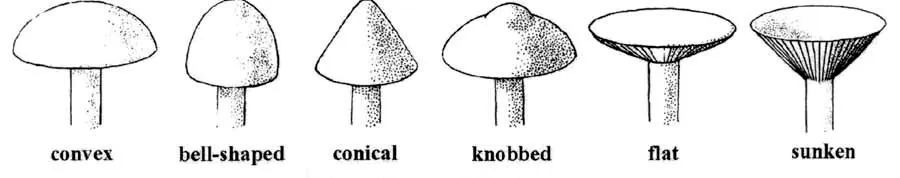

In [15]:
display_image('cap_shape.png')

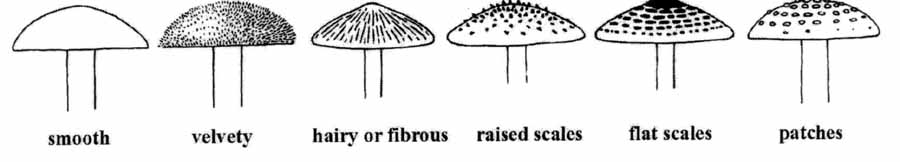

In [16]:
display_image('cap_surface.jpeg')

In [17]:
## select columns related to cap info
cap_data = data.iloc[:, :4]
cap_data
## want to keep this data so we can do OHE on it and look at correlation 

edible cap-shape cap-surface cap-color
0      False         x           s         n
1       True         x           s         y
2       True         b           s         w
3      False         x           y         w
4       True         x           s         g
...      ...       ...         ...       ...
8119    True         k           s         n
8120    True         x           s         n
8121    True         f           s         n
8122   False         k           y         n
8123    True         x           s         n

[8124 rows x 4 columns]

Function to OHE and make corr matrix

In [18]:
## maybe I can make a function that does OHE and then makes the matrix?
def encode_OHE_mat(data, columns, title):
    OHE_encoded = pd.get_dummies(data, columns=columns)
    correlation_matrix = OHE_encoded.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f")
    plt.title(title)
    plt.show()


### Corr matrix

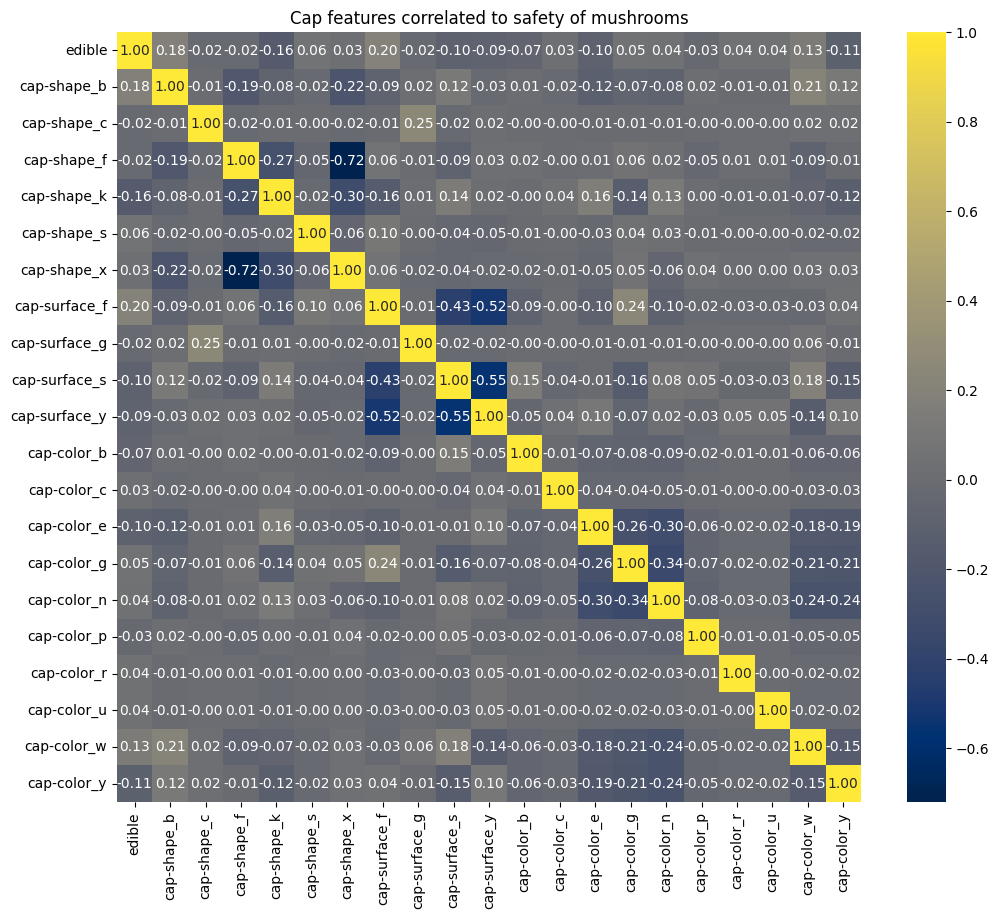

In [19]:
encode_OHE_mat(cap_data, ['cap-shape', 'cap-surface', 'cap-color'], 'Cap features correlated to safety of mushrooms')

### Sunburst chart

In [20]:
nice_cap_data = data.groupby(['edible', 'cap-shape', 'cap-surface', 'cap-color']).size().reset_index(name='count')
nice_cap_data['edible'] = cap_data['edible'].map( { True: 'edible', False:'poisonous'})
nice_cap_data['cap-shape'] = cap_data['cap-shape'].map( {"b" : "bell", "c" : "conical", "x":"convex", "f" : "flat", "k" : "knobbed", "s" : "sunken"} )
nice_cap_data['cap-surface'] = cap_data['cap-surface'].map( {"f" : "fibrous", "g" : "grooves", "y" : "scaly", "s" : "smooth"} )
nice_cap_data['cap-color'] = cap_data['cap-color'].map({"n" : "brown", "b" : "buff", "c" : "cinnamon", "g" : "gray", "r" : "green", "p" : "pink", "u" : "purple", "e" : "red", "w" : "white", "y" : "yellow" })
nice_cap_data

edible cap-shape cap-surface cap-color  count
0    poisonous    convex      smooth     brown      2
1       edible    convex      smooth    yellow      2
2       edible      bell      smooth     white      1
3    poisonous    convex       scaly     white      6
4       edible    convex      smooth      gray      6
..         ...       ...         ...       ...    ...
128     edible    convex      smooth     white     10
129     edible      bell      smooth     white      8
130     edible      bell      smooth     white      8
131     edible      bell       scaly     white     72
132     edible      flat      smooth     white    112

[133 rows x 5 columns]

In [21]:
fig_cap = px.sunburst( nice_cap_data, path=['edible', 'cap-shape', 'cap-surface', 'cap-color'], values ='count')

fig_cap.show()

## Odor

almond=a
anise=l
creosote=c
fishy=y
foul=f
musty=m
none=n
pungent=p
spicy=s

### Corr mat

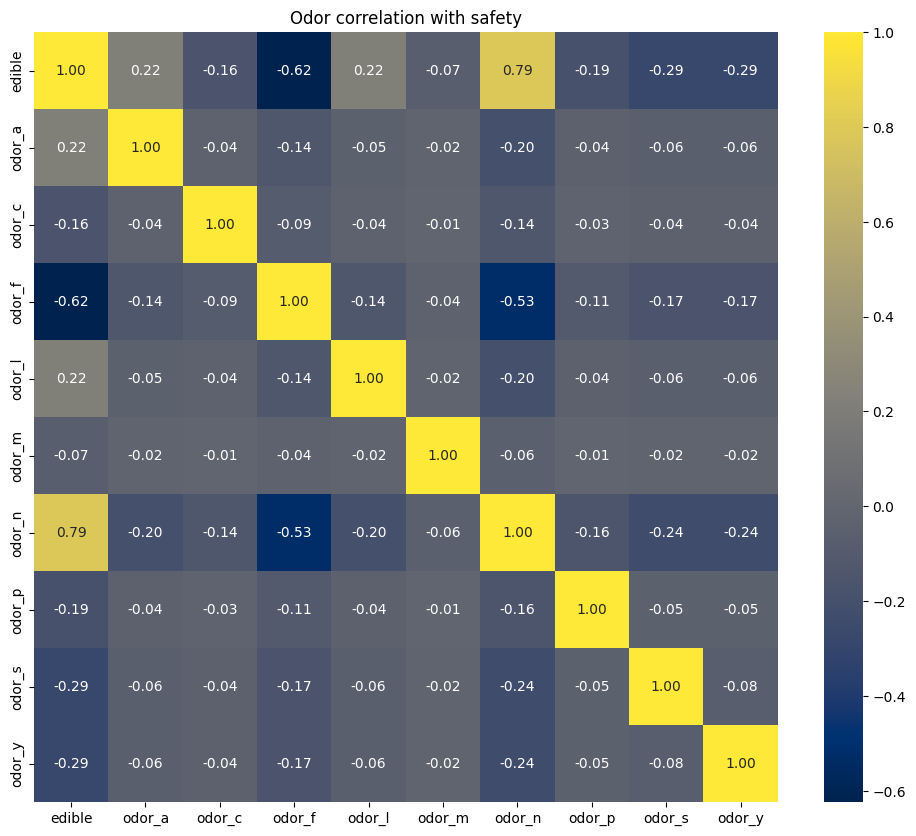

In [22]:
odor_data = data.iloc[:, [0, 4]]

encode_OHE_mat(odor_data, ['odor'], 'Odor correlation with safety')

 Function to select feature and add to our feature df

In [23]:
## Let's make a function that selects for the features we want and adds it to the respective df
def select_feature_and_add_to_df(data, column, feature, feature_df):
    df = pd.get_dummies(data, columns=column)
    variable = df[feature]
    feature_df[feature] = variable
    return feature_df

In [24]:
select_feature_and_add_to_df(odor_data, ['odor'], 'odor_f', poison_features)

odor_f
0      False
1      False
2      False
3      False
4      False
...      ...
8119   False
8120   False
8121   False
8122   False
8123   False

[8124 rows x 1 columns]

In [25]:
OHE_odor_encoded = pd.get_dummies(odor_data, columns=['odor'])
no_smell = OHE_odor_encoded['odor_n']
edible_features['odor_n'] = no_smell
edible_features


odor_n
0      False
1      False
2      False
3      False
4       True
...      ...
8119    True
8120    True
8121    True
8122   False
8123    True

[8124 rows x 1 columns]

### Pie chart of odor

In [26]:
odor_df = data.groupby(['odor']).size().reset_index(name='count')
odor_df['odor_name'] = ['almond', 'creosote', 'foul', 'anise', 'musty', 'none', 'pungent', 'spicy', 'fishy']

name_odors = odor_df['odor_name']
count_odor = odor_df['count']


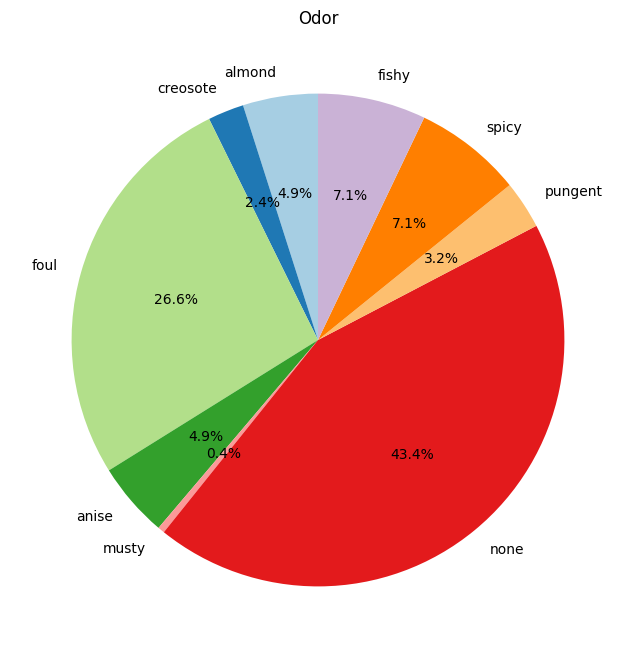

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(count_odor, labels=name_odors, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Odor')
plt.show()

In [28]:
## split data into edible and poisonous, count odor per group
edible_data = data[ data['edible']==1].copy()
edible_odor_df = edible_data.groupby(['odor']).size().reset_index(name='count')

poisonous_data = data[ data['edible'] == 0].copy()
poisonous_odor_df = poisonous_data.groupby(['odor']).size().reset_index(name='count')


### Pie chart of odor in edible vs poisonous mushrooms

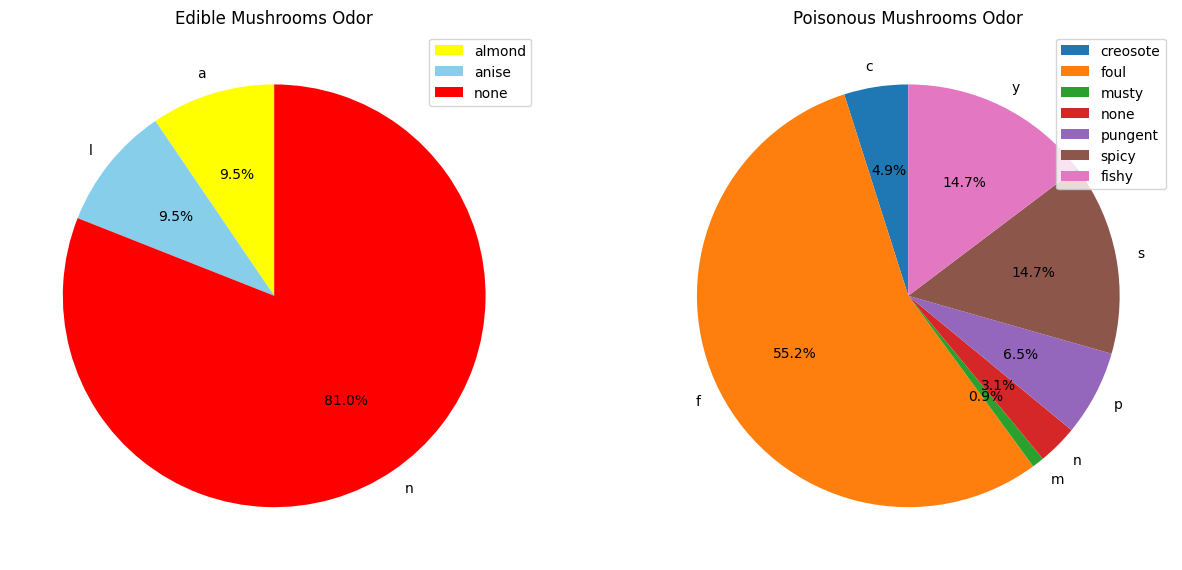

In [29]:
fig1, ax1 = plt.subplots( 1, 2, figsize= (15,10))

ax1[0].pie( edible_odor_df['count'], labels=edible_odor_df['odor'], autopct='%1.1f%%', startangle=90, colors=['yellow', 'skyblue', 'red']);
ax1[0].set_title('Edible Mushrooms Odor')
edible_legend = ['almond', 'anise', 'none']
ax1[0].legend(edible_legend, loc='upper right')

ax1[1].pie( poisonous_odor_df['count'], labels = poisonous_odor_df['odor'], autopct='%1.1f%%', startangle=90);
ax1[1].set_title('Poisonous Mushrooms Odor')
poison_legend = ['creosote', 'foul', 'musty', 'none', 'pungent', 'spicy', 'fishy']
ax1[1].legend(poison_legend, loc='upper right');

### Sunburst chart

In [30]:
if_edible_odor_df = data.groupby(['edible', 'odor']).size().reset_index(name='count')

if_edible_odor_df['edible'] = if_edible_odor_df['edible'].map(
    {True: 'edible',
     False: 'poisonous'}
)
if_edible_odor_df['odor'] = if_edible_odor_df['odor'].map(
    {'c': 'creosote',
     'f': 'foul',
     'm': 'musty',
     'n': 'none',
     'p': 'pungent',
     's': 'spicy',
     'y': 'fishy',
     'a': 'almond',
     'l':'anise',
     }
)

fig_shroom = px.sunburst( if_edible_odor_df, path=['edible', 'odor'], values ='count')
fig_shroom.show()

## Gills

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

In [31]:
gill_data = data.iloc[:, [0, 5, 6, 7, 8]]
gill_data

edible gill-attachment gill-spacing gill-size gill-color
0      False               f            c         n          k
1       True               f            c         b          k
2       True               f            c         b          n
3      False               f            c         n          n
4       True               f            w         b          k
...      ...             ...          ...       ...        ...
8119    True               a            c         b          y
8120    True               a            c         b          y
8121    True               a            c         b          n
8122   False               f            c         n          b
8123    True               a            c         b          y

[8124 rows x 5 columns]

### Corr mat

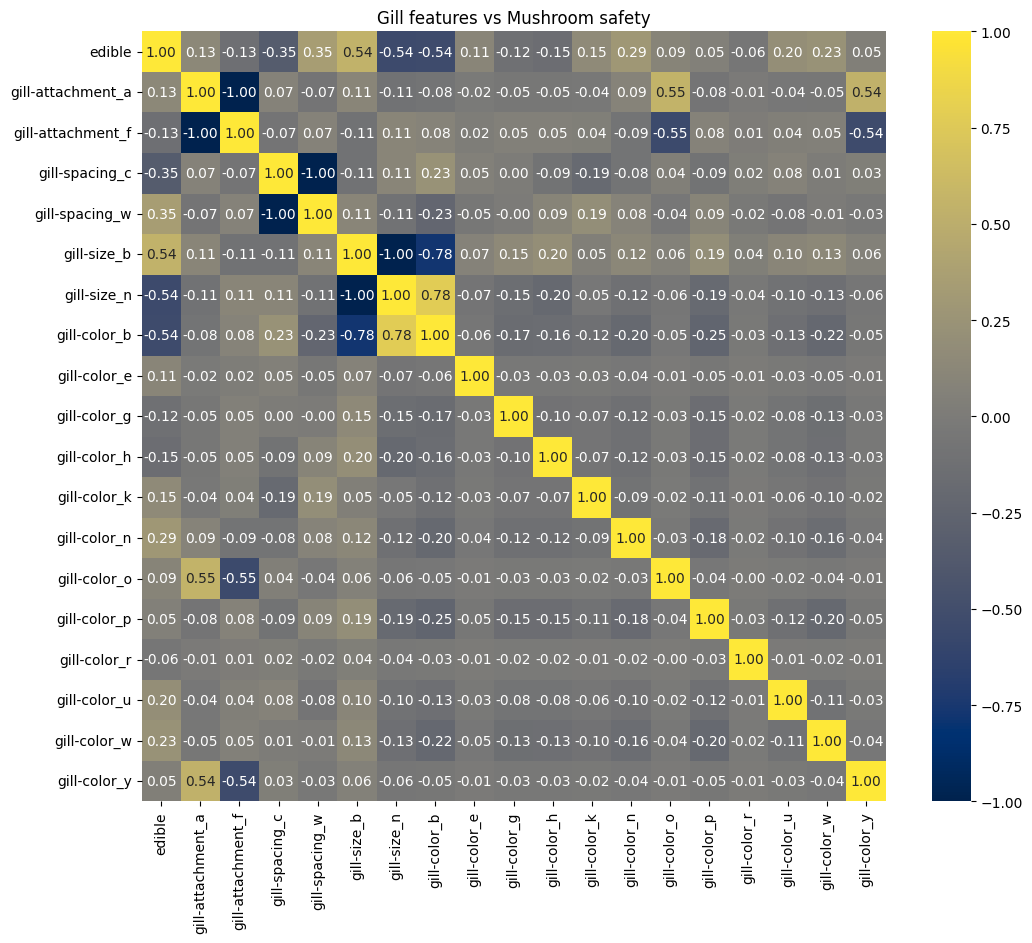

In [32]:
encode_OHE_mat(gill_data, ['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color'], 'Gill features vs Mushroom safety')

In [33]:
## add broad gills to edible features
select_feature_and_add_to_df(gill_data, ['gill-size'], 'gill-size_b', edible_features)

## add narrow gill size and buff gill colour to poison features
select_feature_and_add_to_df(gill_data, ['gill-size'], 'gill-size_n', poison_features)
select_feature_and_add_to_df(gill_data, ['gill-color'], 'gill-color_b', poison_features)

odor_f  gill-size_n  gill-color_b
0      False         True         False
1      False        False         False
2      False        False         False
3      False         True         False
4      False        False         False
...      ...          ...           ...
8119   False        False         False
8120   False        False         False
8121   False        False         False
8122   False         True          True
8123   False        False         False

[8124 rows x 3 columns]

### Gill attachment pie chart 

Function to select feature and make a pie chart 

In [34]:
def select_feature(data, feature, x):
    total_by_feature = data.groupby([feature]).size().reset_index(name='count')
    plt.figure(figsize=(6, 6))
    plt.pie(total_by_feature['count'], labels=total_by_feature[feature], autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {feature} in {x} data')
    plt.legend()
    plt.show()

In [35]:
## replace features with long-form name

edible_data['gill-attachment'] = edible_data['gill-attachment'].map( {"a" : "attached", "d" : "descending", "f" : "free", "n" : "notched"} )
edible_data['gill-spacing'] = edible_data['gill-spacing'].map( {"c" : "close", "w" : "crowded", "d" : "distant"} )
edible_data['gill-size'] = edible_data['gill-size'].map( {"b" : "broad", "n" : "narrow"} )
edible_data['gill-color'] = edible_data['gill-color'].map( {"k" : "black", "n" : "brown", "b" : "buff", "h" : "chocolate", "g" : "gray", "r" : "green", "o" : "orange", "p" : "pink", "u" : "purple", "e" : "red", "w" : "white", "y" : "yellow"})

poisonous_data['gill-attachment'] = poisonous_data['gill-attachment'].map( {"a" : "attached", "d" : "descending", "f" : "free", "n" : "notched"} )
poisonous_data['gill-spacing'] = poisonous_data['gill-spacing'].map( {"c" : "close", "w" : "crowded", "d" : "distant"} )
poisonous_data['gill-size'] = poisonous_data['gill-size'].map( {"b" : "broad", "n" : "narrow"} )
poisonous_data['gill-color'] = poisonous_data['gill-color'].map( {"k" : "black", "n" : "brown", "b" : "buff", "h" : "chocolate", "g" : "gray", "r" : "green", "o" : "orange", "p" : "pink", "u" : "purple", "e" : "red", "w" : "white", "y" : "yellow"})

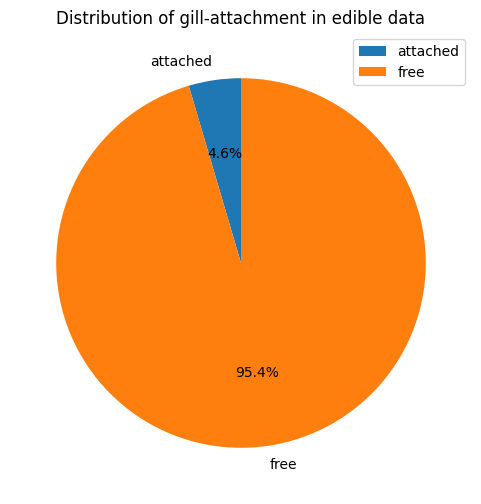

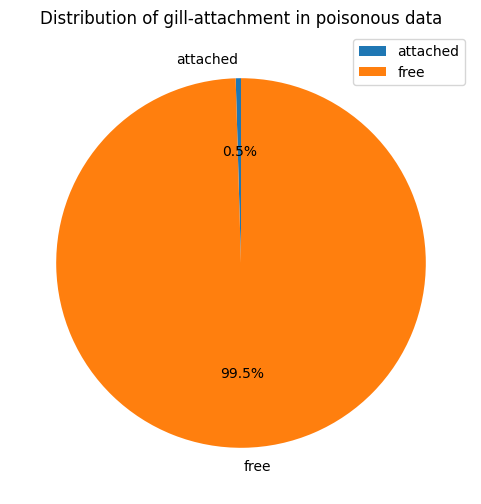

In [36]:
select_feature(edible_data, 'gill-attachment', 'edible')
select_feature(poisonous_data, 'gill-attachment', 'poisonous')

### Gill spacing pie

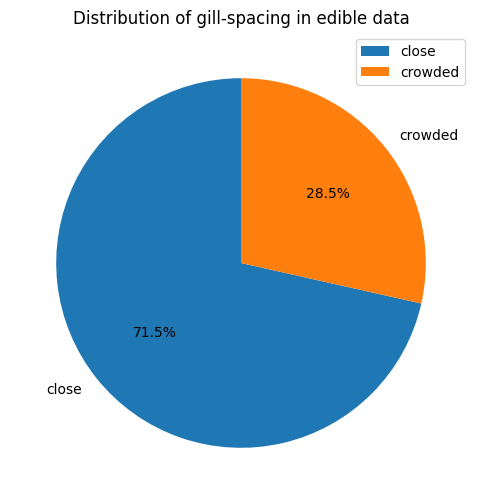

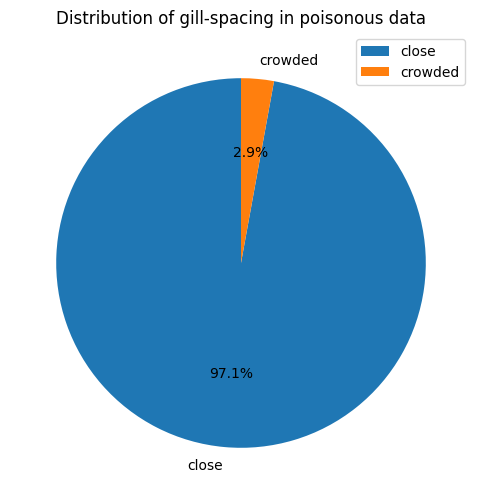

In [37]:
select_feature(edible_data, 'gill-spacing', 'edible')
select_feature(poisonous_data, 'gill-spacing', 'poisonous')

### Gill size pie

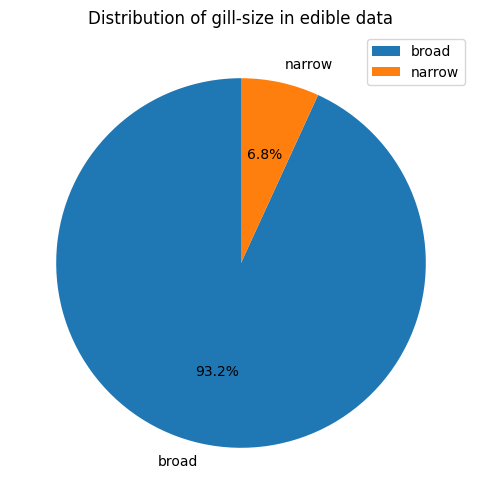

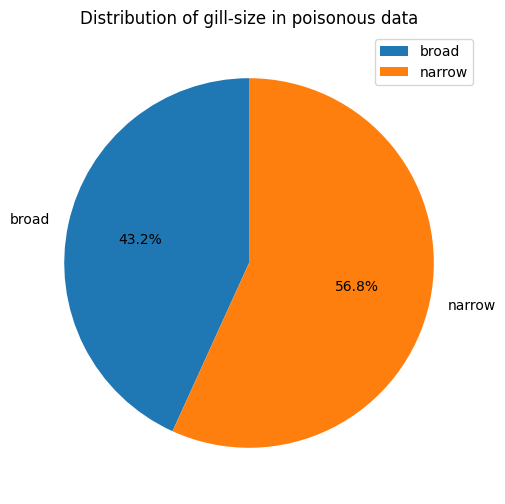

In [38]:
select_feature(edible_data, 'gill-size', 'edible')
select_feature(poisonous_data, 'gill-size', 'poisonous')

### Gill colour pies

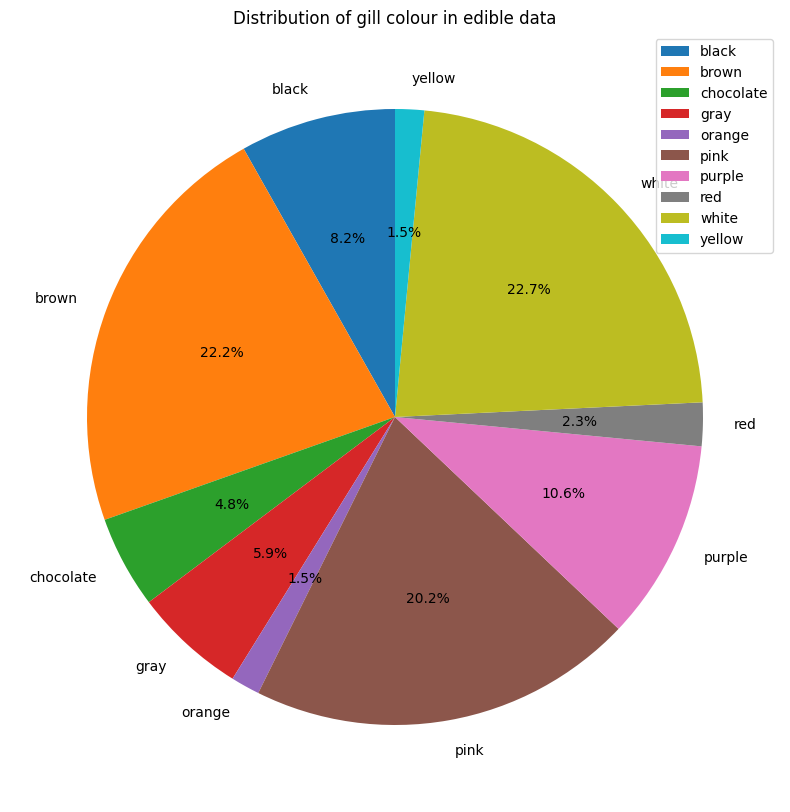

In [39]:
total_by_feature = edible_data.groupby(['gill-color']).size().reset_index(name='count')
plt.figure(figsize=(10, 10))
plt.pie(total_by_feature['count'], labels=total_by_feature['gill-color'], autopct='%1.1f%%', startangle=90)
plt.title(f'Distribution of gill colour in edible data')
plt.legend()
plt.show()

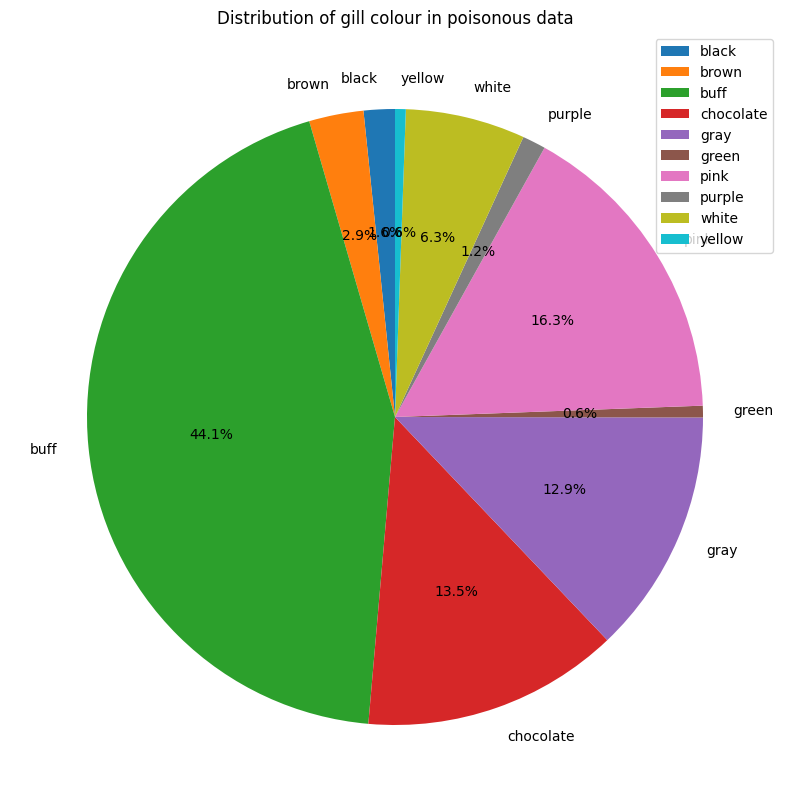

In [40]:
total_by_feature = poisonous_data.groupby(['gill-color']).size().reset_index(name='count')
plt.figure(figsize=(10, 10))
plt.pie(total_by_feature['count'], labels=total_by_feature['gill-color'], autopct='%1.1f%%', startangle=90)
plt.title(f'Distribution of gill colour in poisonous data')
plt.legend()
plt.show()

## Stalk

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

In [41]:
data

edible cap-shape cap-surface cap-color odor gill-attachment  \
0      False         x           s         n    p               f   
1       True         x           s         y    a               f   
2       True         b           s         w    l               f   
3      False         x           y         w    p               f   
4       True         x           s         g    n               f   
...      ...       ...         ...       ...  ...             ...   
8119    True         k           s         n    n               a   
8120    True         x           s         n    n               a   
8121    True         f           s         n    n               a   
8122   False         k           y         n    y               f   
8123    True         x           s         n    n               a   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
0               c         n          k           e          e   
1               c         b          k           e          c   
2               c         b          n           e          c   
3               c         n          n           e          e   
4               w         b          k           t          e   
...           ...       ...        ...         ...        ...   
8119            c         b          y           e          ?   
8120            c         b          y           e          ?   
8121            c         b          n           e          ?   
8122            c         n          b           t          ?   
8123            c         b          y           e          ?   

     stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                           s                        s                      w   
1                           s                        s                      w   
2                           s                        s                      w   
3                           s                        s                      w   
4                           s                        s                      w   
...                       ...                      ...                    ...   
8119                        s                        s                      o   
8120                        s                        s                      o   
8121                        s                        s                      o   
8122                        s                        k                      w   
8123                        s                        s                      o   

     stalk-color-below-ring veil-color ring-number ring-type  \
0                         w          w           o         p   
1                         w          w           o         p   
2                         w          w           o         p   
3                         w          w           o         p   
4                         w          w           o         e   
...                     ...        ...         ...       ...   
8119                      o          o           o         p   
8120                      o          n           o         p   
8121                      o          o           o         p   
8122                      w          w           o         e   
8123                      o          o           o         p   

     spore-print-color population habitat  
0                    k          s       u  
1                    n          n       g  
2                    n          n       m  
3                    k          s       u  
4                    n          a       g  
...                ...        ...     ...  
8119                 b          c       l  
8120                 b          v       l  
8121                 b          c       l  
8122                 w          v       l  
8123                 o          c       l  

[8124 rows x 21 columns]

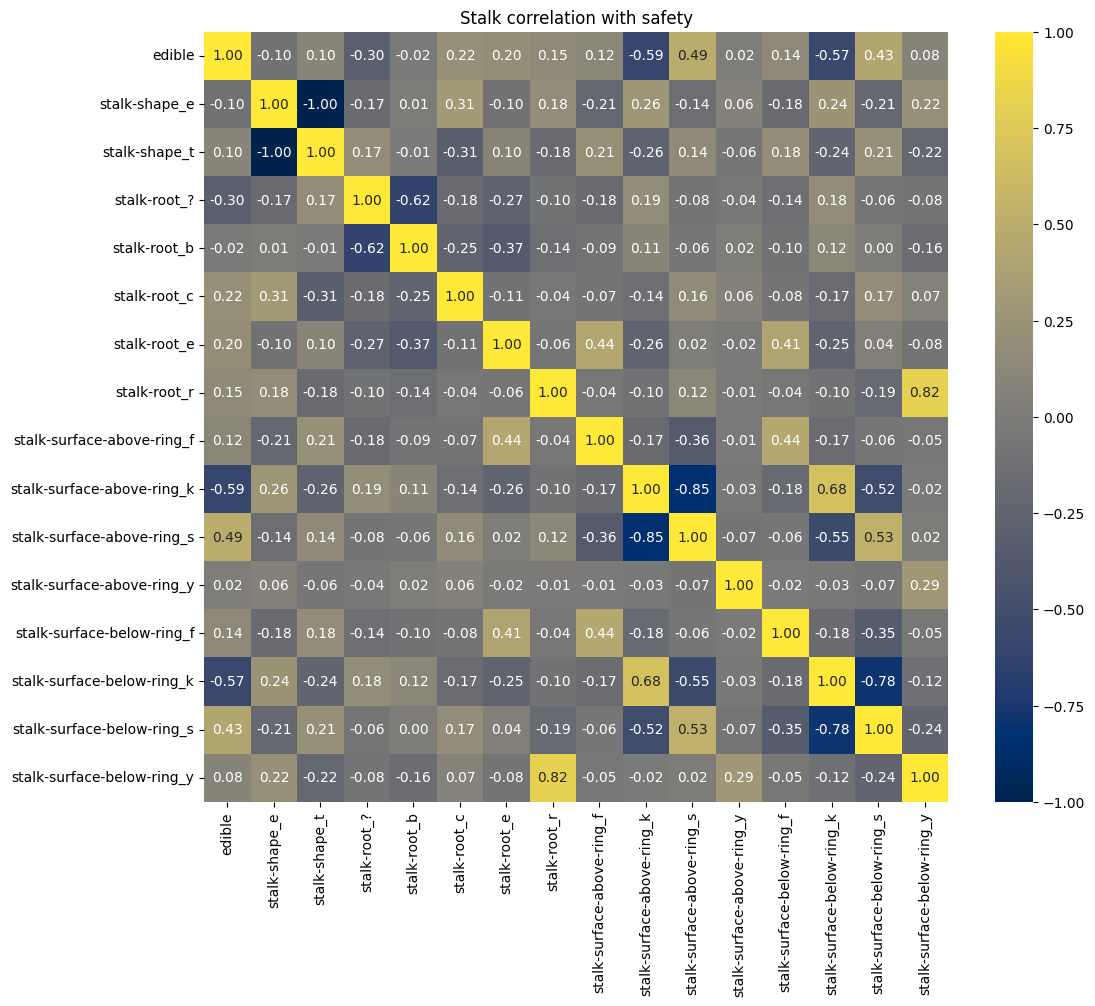

In [42]:
stalk1_data = data.iloc[:, [0, 9, 10, 11, 12]]

encode_OHE_mat(stalk1_data, ['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring'], 'Stalk correlation with safety')

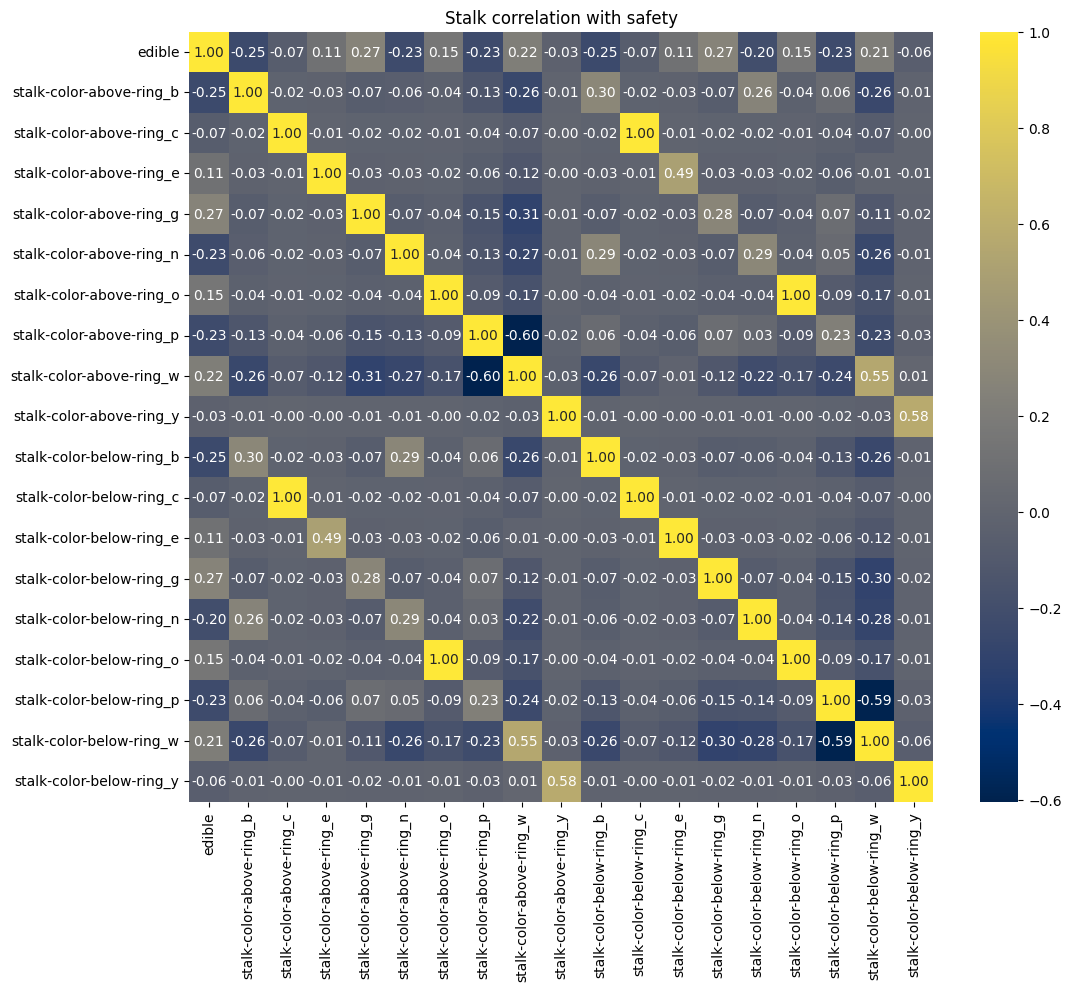

In [43]:
stalk2_data = data.iloc[:, [0, 13, 14]]

encode_OHE_mat(stalk2_data, ['stalk-color-above-ring', 'stalk-color-below-ring'], 'Stalk correlation with safety')

In [44]:
## add smooth above ring to edible features
select_feature_and_add_to_df(stalk1_data, ['stalk-surface-above-ring'], 'stalk-surface-above-ring_s', edible_features)

## add silky above and below ring to poison features 
select_feature_and_add_to_df(stalk1_data, ['stalk-surface-above-ring'], 'stalk-surface-above-ring_k', poison_features)
select_feature_and_add_to_df(stalk1_data, ['stalk-surface-below-ring'], 'stalk-surface-below-ring_k', poison_features)

odor_f  gill-size_n  gill-color_b  stalk-surface-above-ring_k  \
0      False         True         False                       False   
1      False        False         False                       False   
2      False        False         False                       False   
3      False         True         False                       False   
4      False        False         False                       False   
...      ...          ...           ...                         ...   
8119   False        False         False                       False   
8120   False        False         False                       False   
8121   False        False         False                       False   
8122   False         True          True                       False   
8123   False        False         False                       False   

      stalk-surface-below-ring_k  
0                          False  
1                          False  
2                          False  
3                          False  
4                          False  
...                          ...  
8119                       False  
8120                       False  
8121                       False  
8122                        True  
8123                       False  

[8124 rows x 5 columns]

## Veil

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

In [45]:
data

edible cap-shape cap-surface cap-color odor gill-attachment  \
0      False         x           s         n    p               f   
1       True         x           s         y    a               f   
2       True         b           s         w    l               f   
3      False         x           y         w    p               f   
4       True         x           s         g    n               f   
...      ...       ...         ...       ...  ...             ...   
8119    True         k           s         n    n               a   
8120    True         x           s         n    n               a   
8121    True         f           s         n    n               a   
8122   False         k           y         n    y               f   
8123    True         x           s         n    n               a   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
0               c         n          k           e          e   
1               c         b          k           e          c   
2               c         b          n           e          c   
3               c         n          n           e          e   
4               w         b          k           t          e   
...           ...       ...        ...         ...        ...   
8119            c         b          y           e          ?   
8120            c         b          y           e          ?   
8121            c         b          n           e          ?   
8122            c         n          b           t          ?   
8123            c         b          y           e          ?   

     stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                           s                        s                      w   
1                           s                        s                      w   
2                           s                        s                      w   
3                           s                        s                      w   
4                           s                        s                      w   
...                       ...                      ...                    ...   
8119                        s                        s                      o   
8120                        s                        s                      o   
8121                        s                        s                      o   
8122                        s                        k                      w   
8123                        s                        s                      o   

     stalk-color-below-ring veil-color ring-number ring-type  \
0                         w          w           o         p   
1                         w          w           o         p   
2                         w          w           o         p   
3                         w          w           o         p   
4                         w          w           o         e   
...                     ...        ...         ...       ...   
8119                      o          o           o         p   
8120                      o          n           o         p   
8121                      o          o           o         p   
8122                      w          w           o         e   
8123                      o          o           o         p   

     spore-print-color population habitat  
0                    k          s       u  
1                    n          n       g  
2                    n          n       m  
3                    k          s       u  
4                    n          a       g  
...                ...        ...     ...  
8119                 b          c       l  
8120                 b          v       l  
8121                 b          c       l  
8122                 w          v       l  
8123                 o          c       l  

[8124 rows x 21 columns]

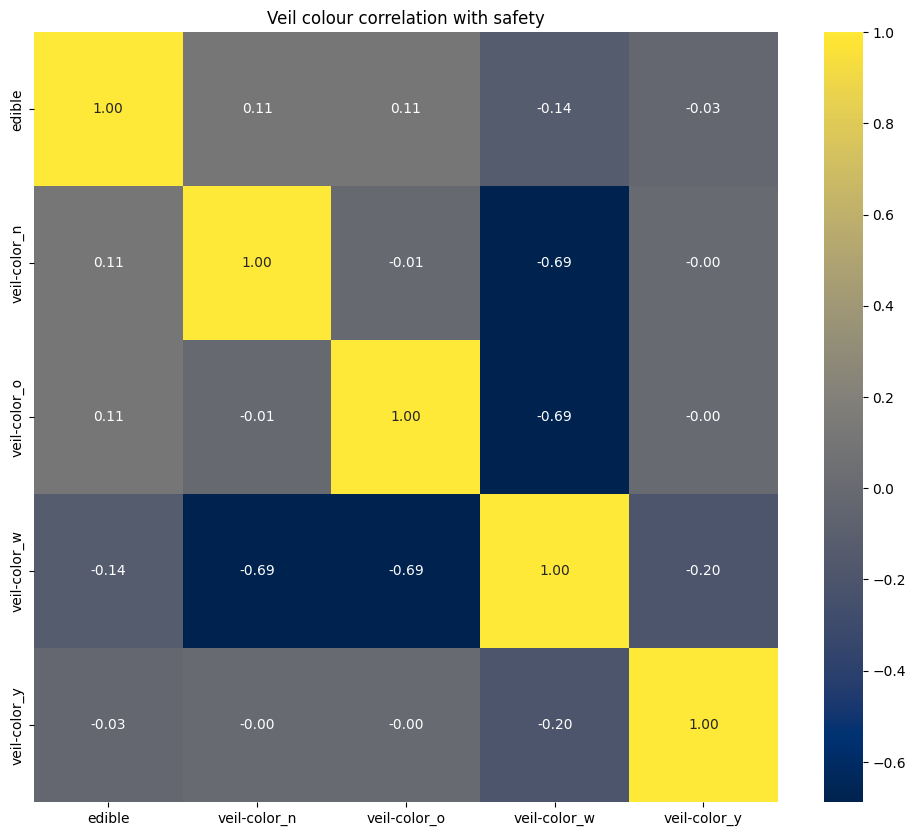

In [46]:
veil_data = data.iloc[:, [0, -6]]

encode_OHE_mat(veil_data, ['veil-color'], 'Veil colour correlation with safety')

## Ring

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z


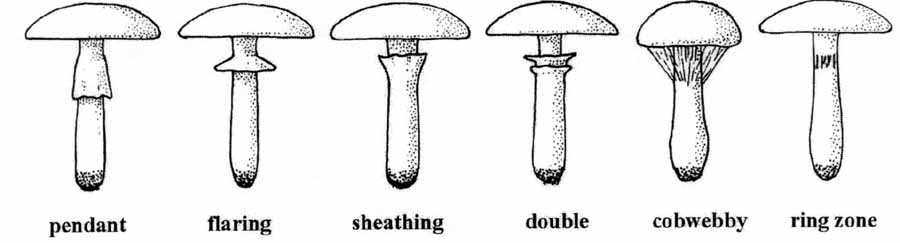

In [47]:
display_image('ring_type.jpg')

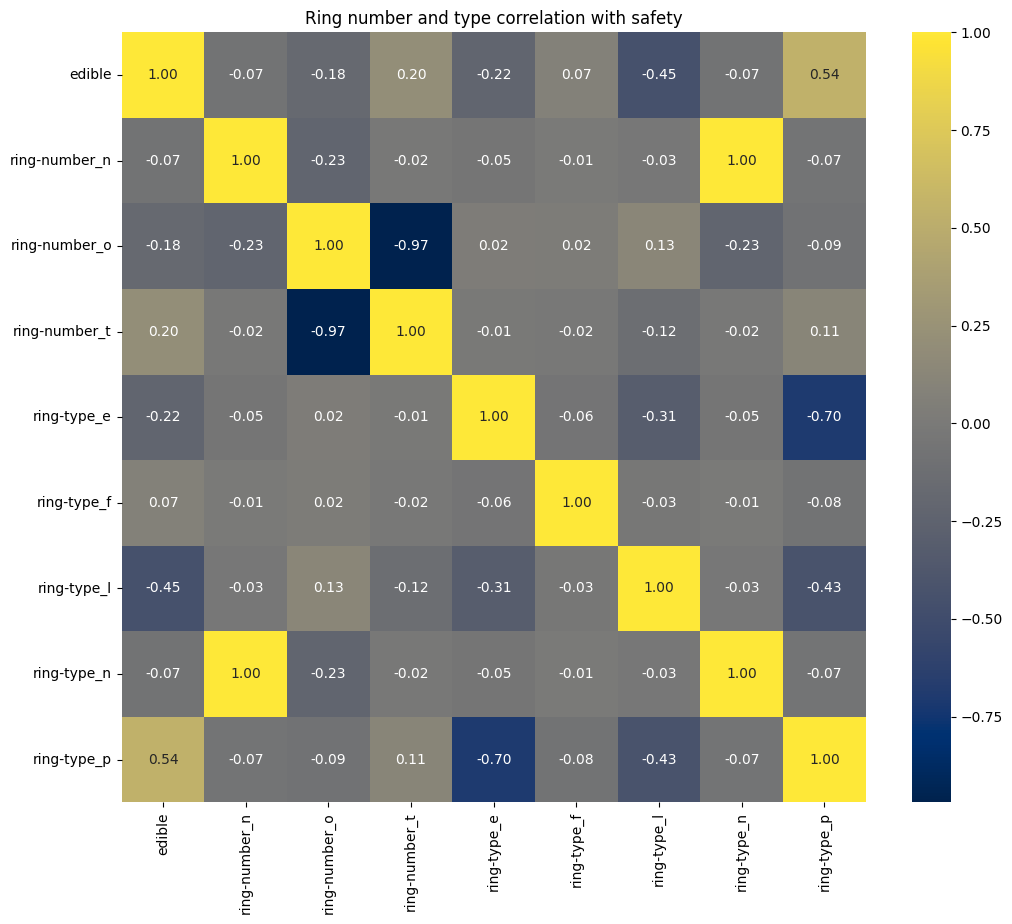

In [48]:
ring_data = data.iloc[:, [0, -5, -4]]

encode_OHE_mat(ring_data, ['ring-number', 'ring-type'], 'Ring number and type correlation with safety')

In [49]:
## add pendant ring to edible features
select_feature_and_add_to_df(ring_data, ['ring-type'], 'ring-type_p', edible_features)

## add large ring to poison features
select_feature_and_add_to_df(ring_data, ['ring-type'], 'ring-type_l', poison_features)

odor_f  gill-size_n  gill-color_b  stalk-surface-above-ring_k  \
0      False         True         False                       False   
1      False        False         False                       False   
2      False        False         False                       False   
3      False         True         False                       False   
4      False        False         False                       False   
...      ...          ...           ...                         ...   
8119   False        False         False                       False   
8120   False        False         False                       False   
8121   False        False         False                       False   
8122   False         True          True                       False   
8123   False        False         False                       False   

      stalk-surface-below-ring_k  ring-type_l  
0                          False        False  
1                          False        False  
2                          False        False  
3                          False        False  
4                          False        False  
...                          ...          ...  
8119                       False        False  
8120                       False        False  
8121                       False        False  
8122                        True        False  
8123                       False        False  

[8124 rows x 6 columns]

## Spore print colour

black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

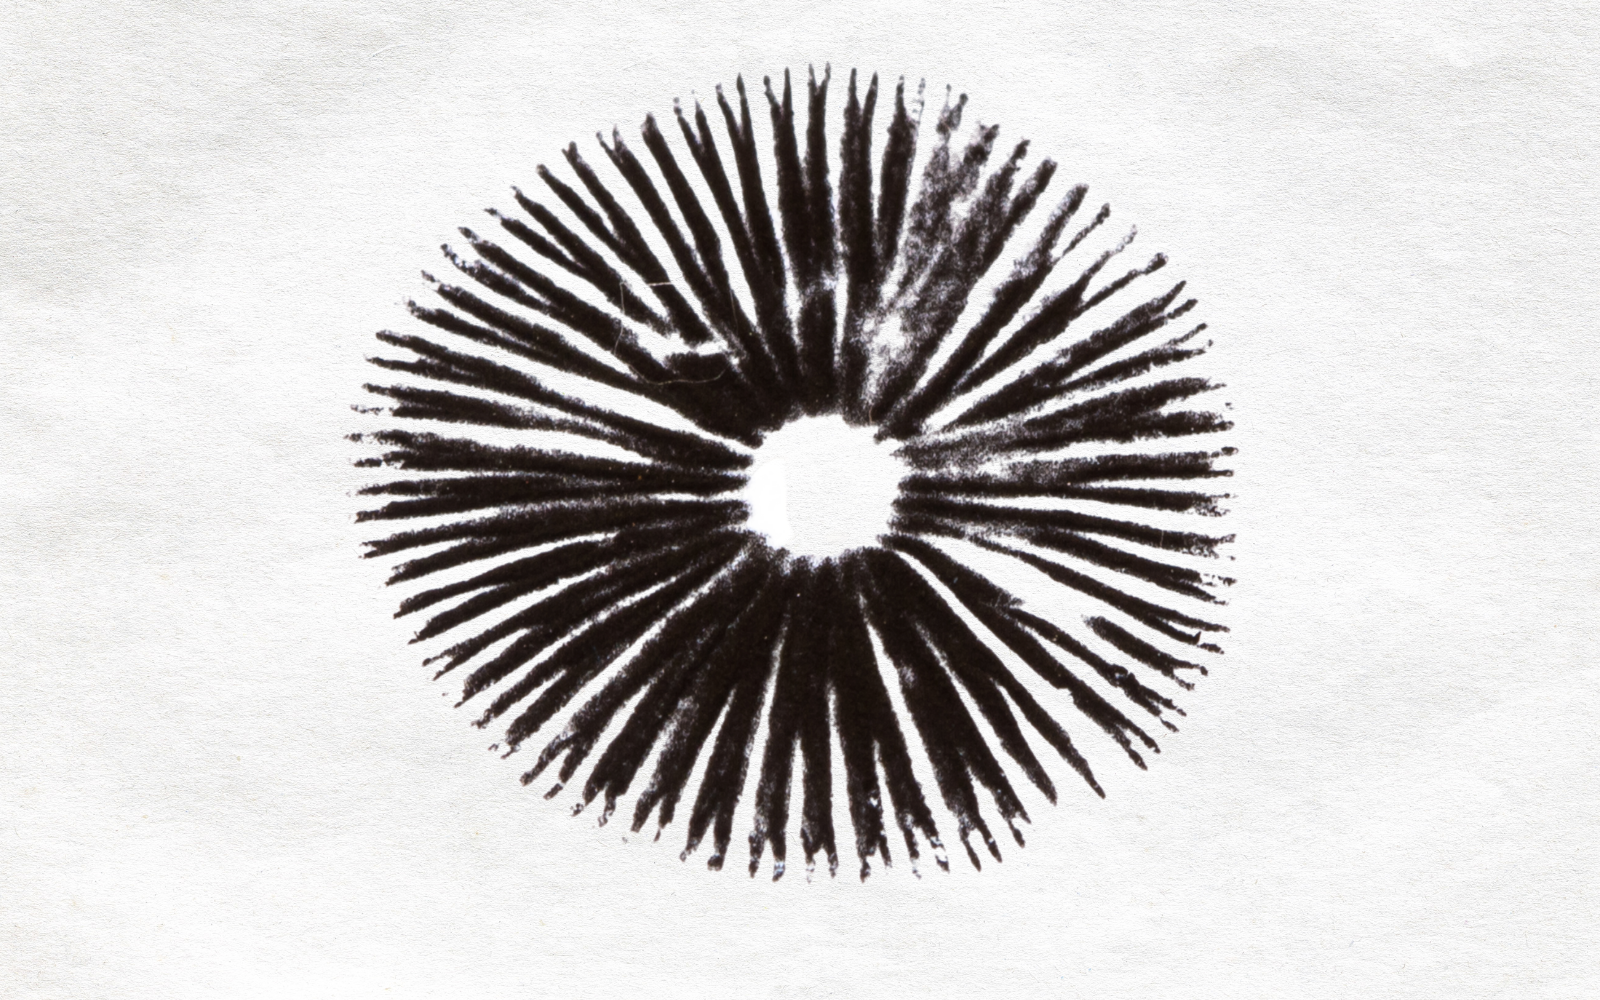

In [50]:
display_image('spore_print.png')

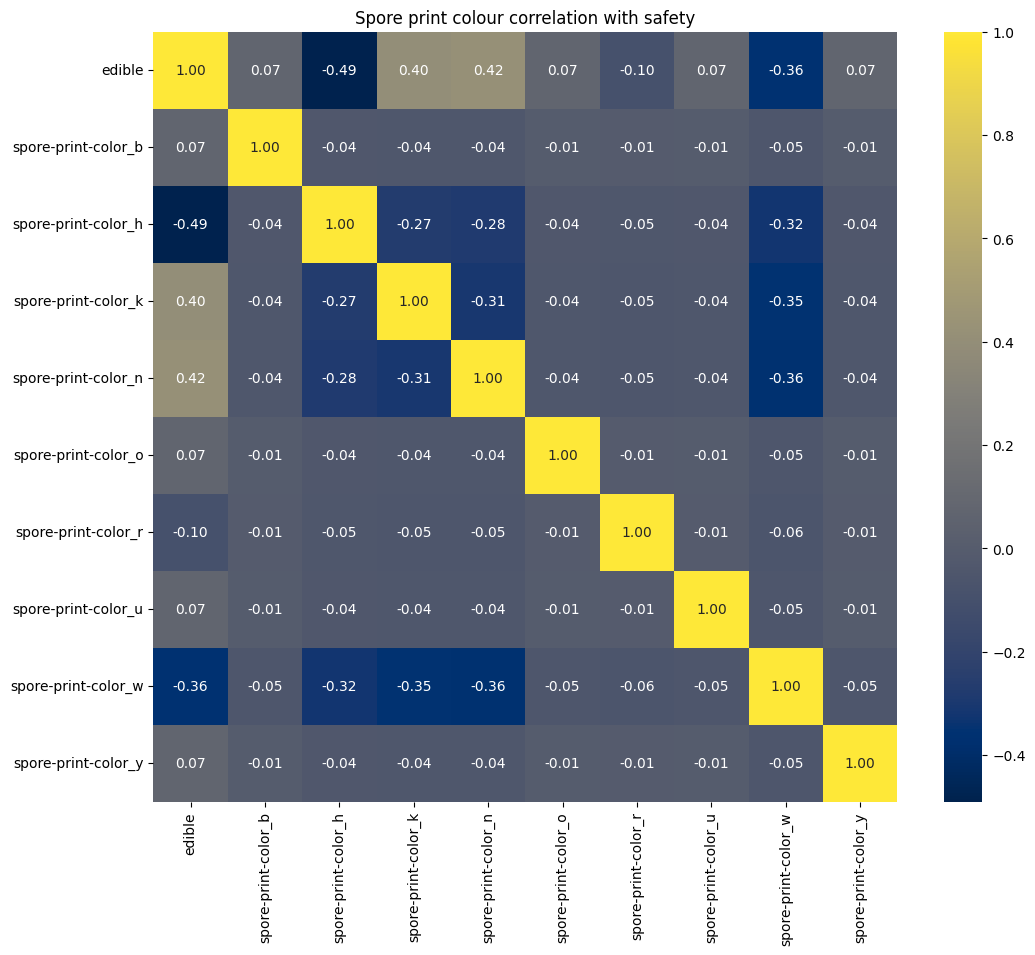

In [51]:
spore_print_data = data.iloc[:, [0, -3]]

encode_OHE_mat(spore_print_data, ['spore-print-color'], 'Spore print colour correlation with safety')

In [52]:
## add black and brown spore print to edible features 
select_feature_and_add_to_df(spore_print_data, ['spore-print-color'], 'spore-print-color_k', edible_features)
select_feature_and_add_to_df(spore_print_data, ['spore-print-color'], 'spore-print-color_n', edible_features)

## add chocoalte and white spore print to poison features
select_feature_and_add_to_df(spore_print_data, ['spore-print-color'], 'spore-print-color_h', poison_features)
select_feature_and_add_to_df(spore_print_data, ['spore-print-color'], 'spore-print-color_w', poison_features)

odor_f  gill-size_n  gill-color_b  stalk-surface-above-ring_k  \
0      False         True         False                       False   
1      False        False         False                       False   
2      False        False         False                       False   
3      False         True         False                       False   
4      False        False         False                       False   
...      ...          ...           ...                         ...   
8119   False        False         False                       False   
8120   False        False         False                       False   
8121   False        False         False                       False   
8122   False         True          True                       False   
8123   False        False         False                       False   

      stalk-surface-below-ring_k  ring-type_l  spore-print-color_h  \
0                          False        False                False   
1                          False        False                False   
2                          False        False                False   
3                          False        False                False   
4                          False        False                False   
...                          ...          ...                  ...   
8119                       False        False                False   
8120                       False        False                False   
8121                       False        False                False   
8122                        True        False                False   
8123                       False        False                False   

      spore-print-color_w  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  
...                   ...  
8119                False  
8120                False  
8121                False  
8122                 True  
8123                False  

[8124 rows x 8 columns]

## Population

abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

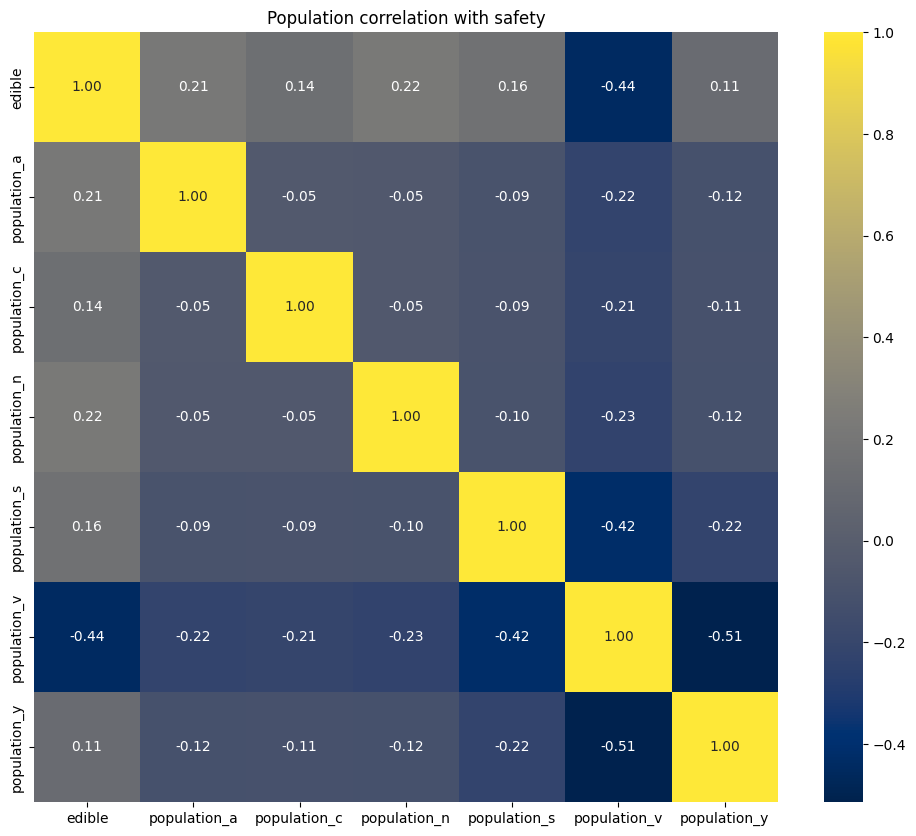

In [53]:
pop_data = data.iloc[:, [0, -2]]

encode_OHE_mat(pop_data, ['population'], 'Population correlation with safety')

In [54]:
## add several to poison features
select_feature_and_add_to_df(pop_data, ['population'], 'population_v', poison_features)

odor_f  gill-size_n  gill-color_b  stalk-surface-above-ring_k  \
0      False         True         False                       False   
1      False        False         False                       False   
2      False        False         False                       False   
3      False         True         False                       False   
4      False        False         False                       False   
...      ...          ...           ...                         ...   
8119   False        False         False                       False   
8120   False        False         False                       False   
8121   False        False         False                       False   
8122   False         True          True                       False   
8123   False        False         False                       False   

      stalk-surface-below-ring_k  ring-type_l  spore-print-color_h  \
0                          False        False                False   
1                          False        False                False   
2                          False        False                False   
3                          False        False                False   
4                          False        False                False   
...                          ...          ...                  ...   
8119                       False        False                False   
8120                       False        False                False   
8121                       False        False                False   
8122                        True        False                False   
8123                       False        False                False   

      spore-print-color_w  population_v  
0                   False         False  
1                   False         False  
2                   False         False  
3                   False         False  
4                   False         False  
...                   ...           ...  
8119                False         False  
8120                False          True  
8121                False         False  
8122                 True          True  
8123                False         False  

[8124 rows x 9 columns]

## Habitat

grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

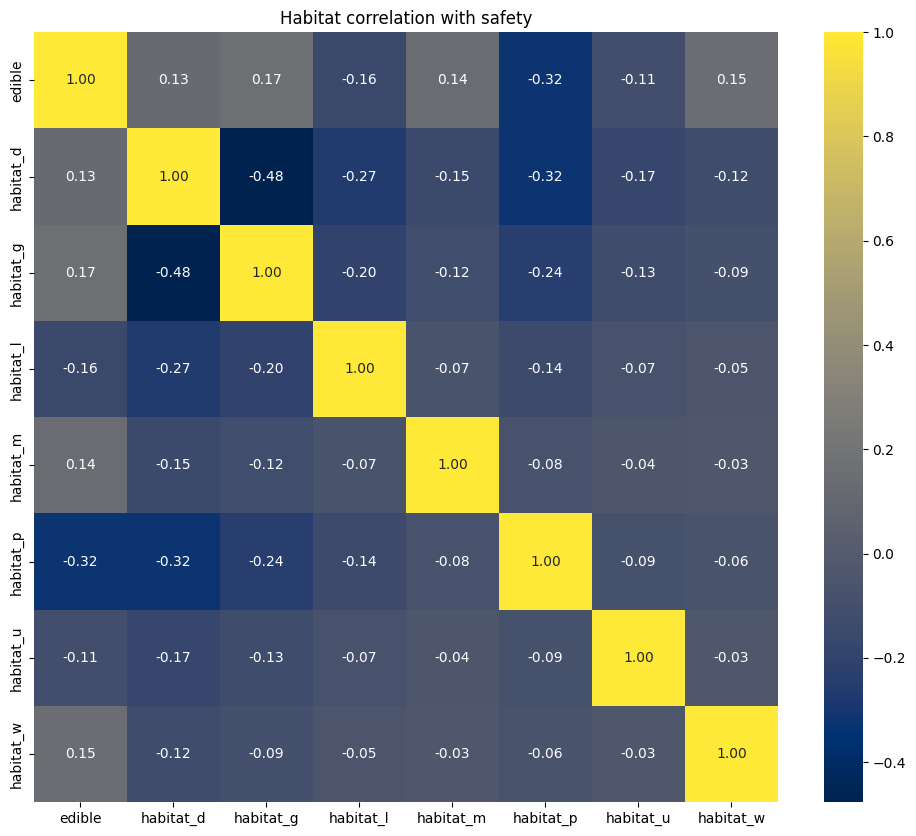

In [55]:
hab_data = data.iloc[:, [0,-1]]

encode_OHE_mat(hab_data, ['habitat'], 'Habitat correlation with safety')

In [56]:
## add paths to poison features
select_feature_and_add_to_df(hab_data, ['habitat'], 'habitat_p', poison_features)

odor_f  gill-size_n  gill-color_b  stalk-surface-above-ring_k  \
0      False         True         False                       False   
1      False        False         False                       False   
2      False        False         False                       False   
3      False         True         False                       False   
4      False        False         False                       False   
...      ...          ...           ...                         ...   
8119   False        False         False                       False   
8120   False        False         False                       False   
8121   False        False         False                       False   
8122   False         True          True                       False   
8123   False        False         False                       False   

      stalk-surface-below-ring_k  ring-type_l  spore-print-color_h  \
0                          False        False                False   
1                          False        False                False   
2                          False        False                False   
3                          False        False                False   
4                          False        False                False   
...                          ...          ...                  ...   
8119                       False        False                False   
8120                       False        False                False   
8121                       False        False                False   
8122                        True        False                False   
8123                       False        False                False   

      spore-print-color_w  population_v  habitat_p  
0                   False         False      False  
1                   False         False      False  
2                   False         False      False  
3                   False         False      False  
4                   False         False      False  
...                   ...           ...        ...  
8119                False         False      False  
8120                False          True      False  
8121                False         False      False  
8122                 True          True      False  
8123                False         False      False  

[8124 rows x 10 columns]

## Parallel categories

In [57]:
edible_features

odor_n  gill-size_b  stalk-surface-above-ring_s  ring-type_p  \
0      False        False                        True         True   
1      False         True                        True         True   
2      False         True                        True         True   
3      False        False                        True         True   
4       True         True                        True        False   
...      ...          ...                         ...          ...   
8119    True         True                        True         True   
8120    True         True                        True         True   
8121    True         True                        True         True   
8122   False        False                        True        False   
8123    True         True                        True         True   

      spore-print-color_k  spore-print-color_n  
0                    True                False  
1                   False                 True  
2                   False                 True  
3                    True                False  
4                   False                 True  
...                   ...                  ...  
8119                False                False  
8120                False                False  
8121                False                False  
8122                False                False  
8123                False                False  

[8124 rows x 6 columns]

In [58]:
poison_features

odor_f  gill-size_n  gill-color_b  stalk-surface-above-ring_k  \
0      False         True         False                       False   
1      False        False         False                       False   
2      False        False         False                       False   
3      False         True         False                       False   
4      False        False         False                       False   
...      ...          ...           ...                         ...   
8119   False        False         False                       False   
8120   False        False         False                       False   
8121   False        False         False                       False   
8122   False         True          True                       False   
8123   False        False         False                       False   

      stalk-surface-below-ring_k  ring-type_l  spore-print-color_h  \
0                          False        False                False   
1                          False        False                False   
2                          False        False                False   
3                          False        False                False   
4                          False        False                False   
...                          ...          ...                  ...   
8119                       False        False                False   
8120                       False        False                False   
8121                       False        False                False   
8122                        True        False                False   
8123                       False        False                False   

      spore-print-color_w  population_v  habitat_p  
0                   False         False      False  
1                   False         False      False  
2                   False         False      False  
3                   False         False      False  
4                   False         False      False  
...                   ...           ...        ...  
8119                False         False      False  
8120                False          True      False  
8121                False         False      False  
8122                 True          True      False  
8123                False         False      False  

[8124 rows x 10 columns]

In [60]:
data["edible-bool"] = data["edible"]
data["edible"] = data["edible"].map({
    False: 'poisonous',
    True:'edible'
})
data

edible cap-shape cap-surface cap-color odor gill-attachment  \
0     poisonous         x           s         n    p               f   
1        edible         x           s         y    a               f   
2        edible         b           s         w    l               f   
3     poisonous         x           y         w    p               f   
4        edible         x           s         g    n               f   
...         ...       ...         ...       ...  ...             ...   
8119     edible         k           s         n    n               a   
8120     edible         x           s         n    n               a   
8121     edible         f           s         n    n               a   
8122  poisonous         k           y         n    y               f   
8123     edible         x           s         n    n               a   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
0               c         n          k           e          e   
1               c         b          k           e          c   
2               c         b          n           e          c   
3               c         n          n           e          e   
4               w         b          k           t          e   
...           ...       ...        ...         ...        ...   
8119            c         b          y           e          ?   
8120            c         b          y           e          ?   
8121            c         b          n           e          ?   
8122            c         n          b           t          ?   
8123            c         b          y           e          ?   

     stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                           s                        s                      w   
1                           s                        s                      w   
2                           s                        s                      w   
3                           s                        s                      w   
4                           s                        s                      w   
...                       ...                      ...                    ...   
8119                        s                        s                      o   
8120                        s                        s                      o   
8121                        s                        s                      o   
8122                        s                        k                      w   
8123                        s                        s                      o   

     stalk-color-below-ring veil-color ring-number ring-type  \
0                         w          w           o         p   
1                         w          w           o         p   
2                         w          w           o         p   
3                         w          w           o         p   
4                         w          w           o         e   
...                     ...        ...         ...       ...   
8119                      o          o           o         p   
8120                      o          n           o         p   
8121                      o          o           o         p   
8122                      w          w           o         e   
8123                      o          o           o         p   

     spore-print-color population habitat  edible-bool  
0                    k          s       u        False  
1                    n          n       g         True  
2                    n          n       m         True  
3                    k          s       u        False  
4                    n          a       g         True  
...                ...        ...     ...          ...  
8119                 b          c       l         True  
8120                 b          v       l         True  
8121                 b          c       l         True  
8122                 w          v       l        Fa

In [61]:
# Convert "edible-bool" to categorical --- this will produce True/False
## the mapping you have used earlier wouldn't work, it want it in categorical value
data["edible-bool"] = data["edible-bool"].astype('category')

In [94]:
## Creating parallel categores chart

# Create dimensions
# odor
odor_dim = go.parcats.Dimension(
    values=data["odor"], label="Odor"
)
# gill-size
gill_size_dim = go.parcats.Dimension(
    values=data["gill-size"], label="Gill size")

# gill-color
gill_col_dim = go.parcats.Dimension(
    values=data["gill-color"], label="Gill colour"
)

#stalk-surface-above-ring
stalk_surface_above_ring_dim = go.parcats.Dimension(
    values = data['stalk-surface-above-ring'], 
    label = "Stalk-Surface-above-Ring"
)

# stalk-surface-below-ring
stalk_surface_bellow_ring_dim = go.parcats.Dimension(
    values=data["stalk-surface-below-ring"], label="Stalk-Surface-bellow-Ring"
)

# ring-type
ring_type_dim = go.parcats.Dimension(
    values=data["ring-type"], label="Ring-Type"
)

# spore-print-colour
spore_print_color_dim = go.parcats.Dimension(
    values=data["spore-print-color"], label="Spore-Print-Colour"
)

# population
pop_dim = go.parcats.Dimension(
    values=data["population"], label="Population"
)

# edible
edible_dim = go.parcats.Dimension(
    values=data["edible"],
    label="Edible",
    categoryarray=["edible", "poisonous"],
    ticktext=["edible", "poisonous"],
)

In [95]:
# Create parcats trace
color = data["edible-bool"].cat.codes
colorscale = [[0, 'red'], [1, 'green']]

# create figure object
fig = go.Figure(
    data=[
        go.Parcats(
            dimensions=[
                odor_dim,
                gill_size_dim,
                gill_col_dim,
                stalk_surface_above_ring_dim,
                stalk_surface_bellow_ring_dim,
                ring_type_dim,
                spore_print_color_dim,
                pop_dim,
                edible_dim,
            ],
            line={"color": color, "colorscale": colorscale},
            hoveron="color",
            hoverinfo="count + probability",
            labelfont={"size": 18, "family": "Times"},
            tickfont={"size": 16, "family": "Times"},
            arrangement="freeform",
        )
    ]
)

# display the figure
fig.show()

In [64]:
print(data['edible'].dtype)

object


# Model

## Select for features that showed correlation

In [65]:
## split into dependent and indep variables

## dep variable is the class - poisonous or edible 
y = data.iloc[:, 0]

## we have been collecting the 'relevant' features throughout our EDA
X_edible = edible_features.copy()
X_poison = poison_features.copy()

In [66]:
X = pd.concat( [X_edible, X_poison], axis=1)
X

odor_n  gill-size_b  stalk-surface-above-ring_s  ring-type_p  \
0      False        False                        True         True   
1      False         True                        True         True   
2      False         True                        True         True   
3      False        False                        True         True   
4       True         True                        True        False   
...      ...          ...                         ...          ...   
8119    True         True                        True         True   
8120    True         True                        True         True   
8121    True         True                        True         True   
8122   False        False                        True        False   
8123    True         True                        True         True   

      spore-print-color_k  spore-print-color_n  odor_f  gill-size_n  \
0                    True                False   False         True   
1                   False                 True   False        False   
2                   False                 True   False        False   
3                    True                False   False         True   
4                   False                 True   False        False   
...                   ...                  ...     ...          ...   
8119                False                False   False        False   
8120                False                False   False        False   
8121                False                False   False        False   
8122                False                False   False         True   
8123                False                False   False        False   

      gill-color_b  stalk-surface-above-ring_k  stalk-surface-below-ring_k  \
0            False                       False                       False   
1            False                       False                       False   
2            False                       False                       False   
3            False                       False                       False   
4            False                       False                       False   
...            ...                         ...                         ...   
8119         False                       False                       False   
8120         False                       False                       False   
8121         False                       False                       False   
8122          True                       False                        True   
8123         False                       False                       False   

      ring-type_l  spore-print-color_h  spore-print-color_w  population_v  \
0           False                False                False         False   
1           False                False                False         False   
2           False                False                False         False   
3           False                False                False         False   
4           False                False                False         False   
...           ...                  ...                  ...           ...   
8119        False                False                False         False   
8120        False                False                False          True   
8121        False                False                False         False   
8122        False                False                 True          True   
8123        False                False                False         False   

      habitat_p  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
8119      False  
8120      False  
8121      False  
8122      False  
8123      False  

[8124 rows x 16 columns]

## Naive Bayes

In [67]:
## data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

## create naive bayes
gaussian_model = GaussianNB() 

## train model
gaussian_model.fit(X_train, y_train)

## make prediction
pred_NB = gaussian_model.predict(X_test)

In [68]:
## calculate accuracy and confusion matrix
accuracy_NB = accuracy_score(y_test, pred_NB)
conf_mat_NB =  confusion_matrix(y_test,pred_NB)

print(accuracy_NB)

0.9276218611521418


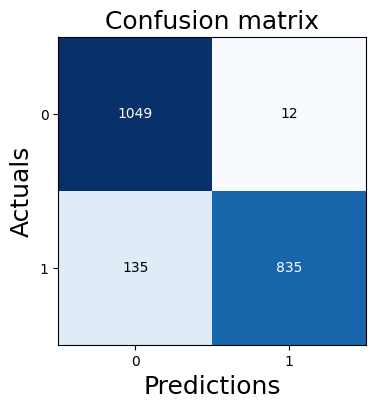

In [69]:
fig, ax2 = plot_confusion_matrix(conf_mat=conf_mat_NB, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## Logistic Regression

In [70]:
## train logistic regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

##  make LR prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

## calculate accuracy and confusion matrix
accuracy_LR = accuracy_score(y_test, pred_LR)
conf_mat_LR =  confusion_matrix(y_test,pred_LR )

print(accuracy_LR)

0.9763663220088626


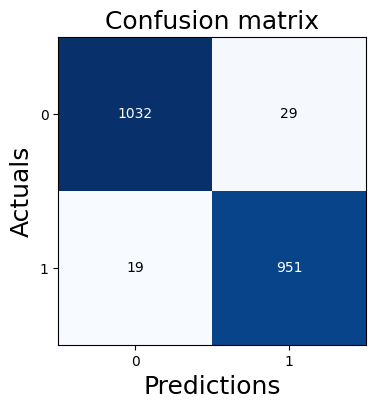

In [71]:
fig, ax2 = plot_confusion_matrix(conf_mat=conf_mat_LR, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## TP 37, FP 4
## FN 5, TN 14

## k Nearest Neighbour

In [72]:
## build kNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

## make prediction
y_pred_knn = knn_model.predict(X_test)

## calculate accuracy and confusion matrix
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)


print(accuracy_knn)
print(conf_mat_knn)

0.9812900049236829
[[1023   38]
 [   0  970]]


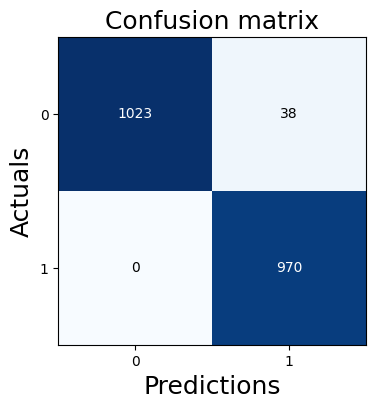

In [73]:
fig, ax4 = plot_confusion_matrix(conf_mat=conf_mat_knn, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## Decision Tree Classifier

In [74]:
## default Decision Tree
decisionTree_model_gini = DecisionTreeClassifier()

## entropy decision tree
decisionTree_model_entropy = DecisionTreeClassifier(criterion='entropy')

## max depth 3 decision tree
decisionTree_model_depth3 = DecisionTreeClassifier(max_depth=3)

## Fit models
decisionTree_model_gini.fit(X_train, y_train)
decisionTree_model_entropy.fit(X_train, y_train)
decisionTree_model_depth3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [75]:
# Make predictions
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth3.predict(X_test)

### Gini

In [76]:
## calculate accuracy and confusion matrix
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)


print(accuracy_gini)
print(conf_mat_gini)

0.9812900049236829
[[1023   38]
 [   0  970]]


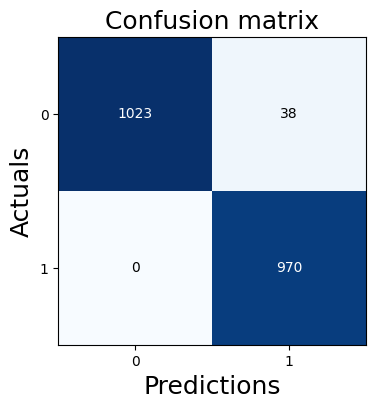

In [77]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_gini, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

### Entropy

In [78]:
## calculate accuracy and confusion matrix
accuracy_entropy = accuracy_score(y_test, y_pred_gini)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)


print(accuracy_entropy)
print(conf_mat_entropy)

0.9812900049236829
[[1023   38]
 [   0  970]]


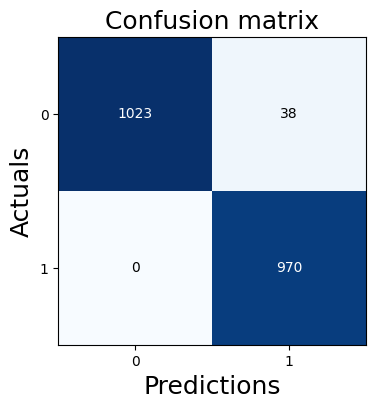

In [79]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_entropy, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

### Max depth 3

In [80]:
accuracy_depth3 = accuracy_score(y_test, y_pred_depth3)
conf_mat_depth3 = confusion_matrix(y_test, y_pred_depth3)


print(accuracy_depth3)
print(conf_mat_depth3)

0.9374692269817824
[[1032   29]
 [  98  872]]


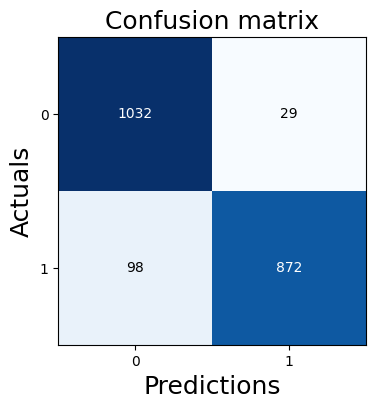

In [81]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_depth3, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## SVM

In [82]:
## create 3 svm classifiers
linear_SVM = svm.SVC(kernel='linear')
sigmoid_SVM = svm.SVC(kernel='sigmoid')
rbf_SVM = svm.SVC(kernel='rbf')

## train model on our data
linear_SVM.fit(X_train, y_train)
sigmoid_SVM.fit(X_train, y_train)
rbf_SVM.fit(X_train, y_train)

## predict 
y_pred_linear = linear_SVM.predict(X_test)
y_pred_sigmoid = sigmoid_SVM.predict(X_test)
y_pred_rbf = rbf_SVM.predict(X_test)

### Linear

In [83]:
## calculate accuracy and confusion matrix
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)


print(accuracy_linear)
print(conf_mat_linear)

0.9763663220088626
[[1032   29]
 [  19  951]]


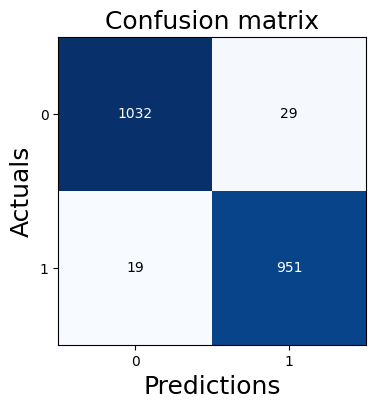

In [84]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_linear, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

### Sigmoid

In [85]:
## calculate accuracy and confusion matrix
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)


print(accuracy_sigmoid)
print(conf_mat_sigmoid)


0.9453471196454948
[[1022   39]
 [  72  898]]


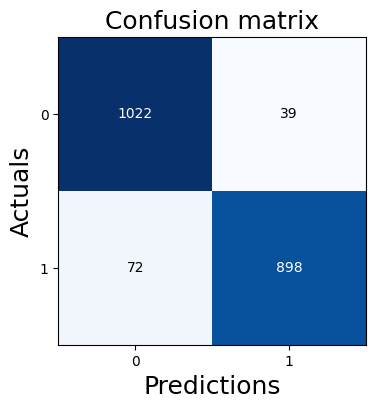

In [86]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_sigmoid, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

### RBF

In [87]:
## calculate accuracy and confusion matrix
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)


print(accuracy_rbf)
print(conf_mat_rbf)

0.982767109798129
[[1043   18]
 [  17  953]]


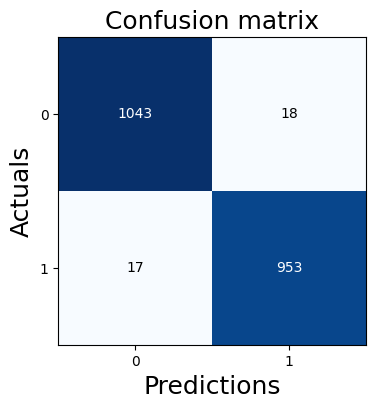

In [88]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_rbf, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## Random Forest

In [89]:
## setup random forest
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

## predict 
pred_RF = RF.predict(X_test)

In [90]:
## calculate accuracy and confusion matrix
accuracy_RF = accuracy_score(y_test, pred_RF)
conf_mat_RF = confusion_matrix(y_test, pred_RF)


print(accuracy_RF)
print(conf_mat_RF)

0.9812900049236829
[[1023   38]
 [   0  970]]


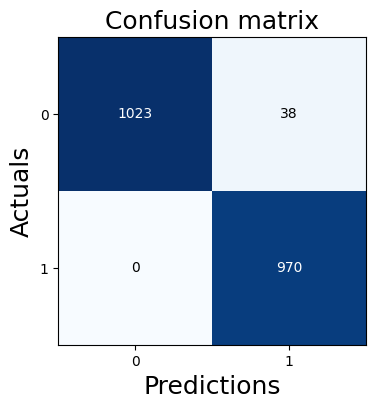

In [91]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_RF, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()